<a href="https://colab.research.google.com/github/cmccomb/TrussMe/blob/main/examples/stochastic_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install TrussMe

In [1]:
!pip install git+https://github.com/cmccomb/TrussMe.git -qqq

  Preparing metadata (setup.py) ... done


# Construct Truss

In [2]:
import numpy
import trussme
import scipy.spatial

## Make joints

In [3]:
inner_radius = 0.8
outer_radius = 1.0
number_of_initial_joints = 1000

In [4]:
xy = 2*outer_radius*numpy.random.rand(number_of_initial_joints, 2) - outer_radius

In [5]:
filtered_xy = []
for row in xy:
    if numpy.sqrt(row[0]**2 + row[1]**2) < outer_radius and numpy.sqrt(row[0]**2 + row[1]**2) > inner_radius and row[1] > 0:
        filtered_xy.append([row[0], row[1]])

filtered_xy.append([-outer_radius, 0.0])
filtered_xy.append([-inner_radius, 0.0])
filtered_xy.append([outer_radius, 0.0])
filtered_xy.append([inner_radius, 0.0])
filtered_xy.append([0.0, outer_radius])

## Make Members

In [6]:
tri = scipy.spatial.Delaunay(filtered_xy)

In [7]:
connectivity = numpy.zeros((len(filtered_xy),len(filtered_xy)))

In [8]:
for row in tri.simplices:
    connectivity[row[0], row[1]] = 1
    connectivity[row[1], row[2]] = 1
    connectivity[row[0], row[2]] = 1
    connectivity[row[1], row[0]] = 1
    connectivity[row[2], row[1]] = 1
    connectivity[row[2], row[0]] = 1

## Build Truss

In [9]:
truss = trussme.Truss()

for joint in filtered_xy[:-5]:
    truss.add_free_joint([joint[0], joint[1], 0])

for joint in filtered_xy[-5:-1]:
    truss.add_pinned_joint([joint[0], joint[1], 0])

loaded_joint = truss.add_free_joint([filtered_xy[-1][0], filtered_xy[-1][1], 0])
truss.set_load(loaded_joint, [0, -10000, 0])
truss.add_out_of_plane_support("z")

for idx in range(len(filtered_xy)):
    for jdx in range(idx, len(filtered_xy)):
        if connectivity[idx][jdx]:
            midpoint = (numpy.array(truss.joints[idx].coordinates) + numpy.array(truss.joints[jdx].coordinates))/2
            if numpy.sqrt(midpoint[0]**2 + midpoint[1]**2) > 0.95*inner_radius:
                truss.add_member(idx, jdx)


# Analyze and Show the Truss

In [10]:
truss.analyze()

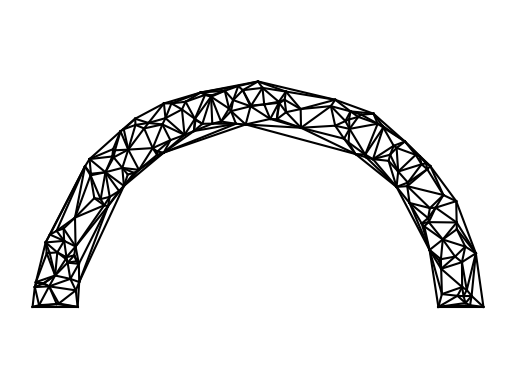

In [11]:
trussme.visualize.plot_truss(truss, deflected_shape=False);

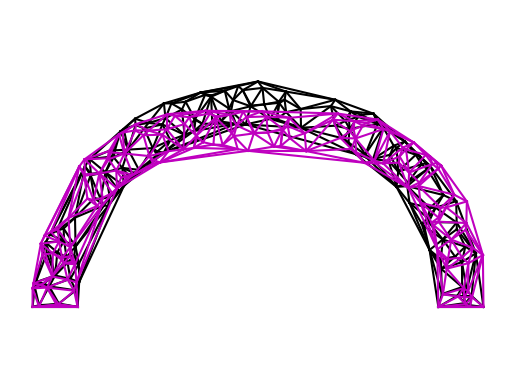

In [12]:
trussme.visualize.plot_truss(truss, deflected_shape=True, exaggeration_factor=1000);